In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# observation :
# 1) There are 550068 rows and 10 columns
# 2) from this we can see there is no missing value

In [ ]:
# Changing the Datatype of the columns
for i in df.columns[:-1]:
  df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
# observations:
# 1) user_id :
# - Among 5,50,068 transactions there are 5891 unique
# userid indicating same customers buying multiple products`
# 2) Product_id
# - Among 5,50,068 transactions there are 3631 unique product
#  with the product having the code "P00265242" being the highest seller
#  with a maximum of 1,880 units sold
# 3) Gender :
# - Out of 5,50,068 transactions 4,14,259 (nearly 75%)
#  were done by male gender indicating a significant disparity in
#  purchace behaviour between males and females during the black friday sales
# 4) Age :
# - we have 7 unique age group in the dataset
# 26-35 Age group has maximum of 2,19,587 transactions.
# 5) stay_in_current_city_years
# - Customers with 1 year of stay in current city accounted to
# maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city
# 6) Maritial Status:
# - 59% of the total transactions were done by unmarried customers
# and 41% by married customers

In [ ]:
df.duplicated().value_counts()

False    550068
dtype: int64

In [ ]:
# observation:
# There is no duplication

In [ ]:
# checking with columns
for i in df.columns:
  print("unique values in", i,"columns are: ")
  print(df[i].unique())
  print('-'*50)

unique values in User_ID columns are: 
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
--------------------------------------------------
unique values in Product_ID columns are: 
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
--------------------------------------------------
unique values in Gender columns are: 
['F', 'M']
Categories (2, object): ['F', 'M']
--------------------------------------------------
unique values in Age columns are: 
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46

In [ ]:
# Missing Value Analysis
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: xlabel='Purchase', ylabel='Count'>

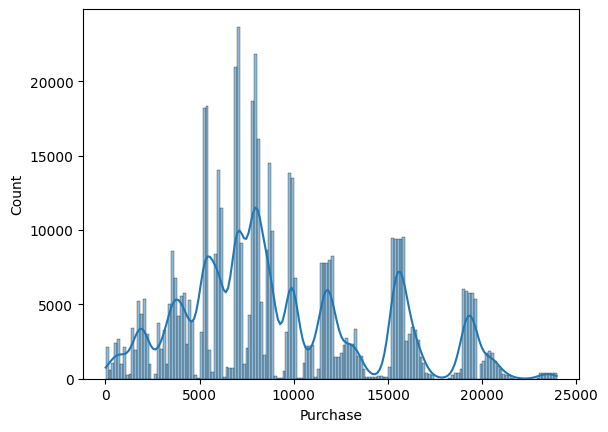

In [ ]:
# univariate Analysis
# Purchase Amount Distribution
sns.histplot(data=df,x='Purchase',kde=True)

In [ ]:
# observation
# Data Suggests that the majority of the customers spent between 5000 to 12000
# with median purchase amount 8047

In [ ]:
# Categorical Variables
# Gender
# Maritial Status
# city

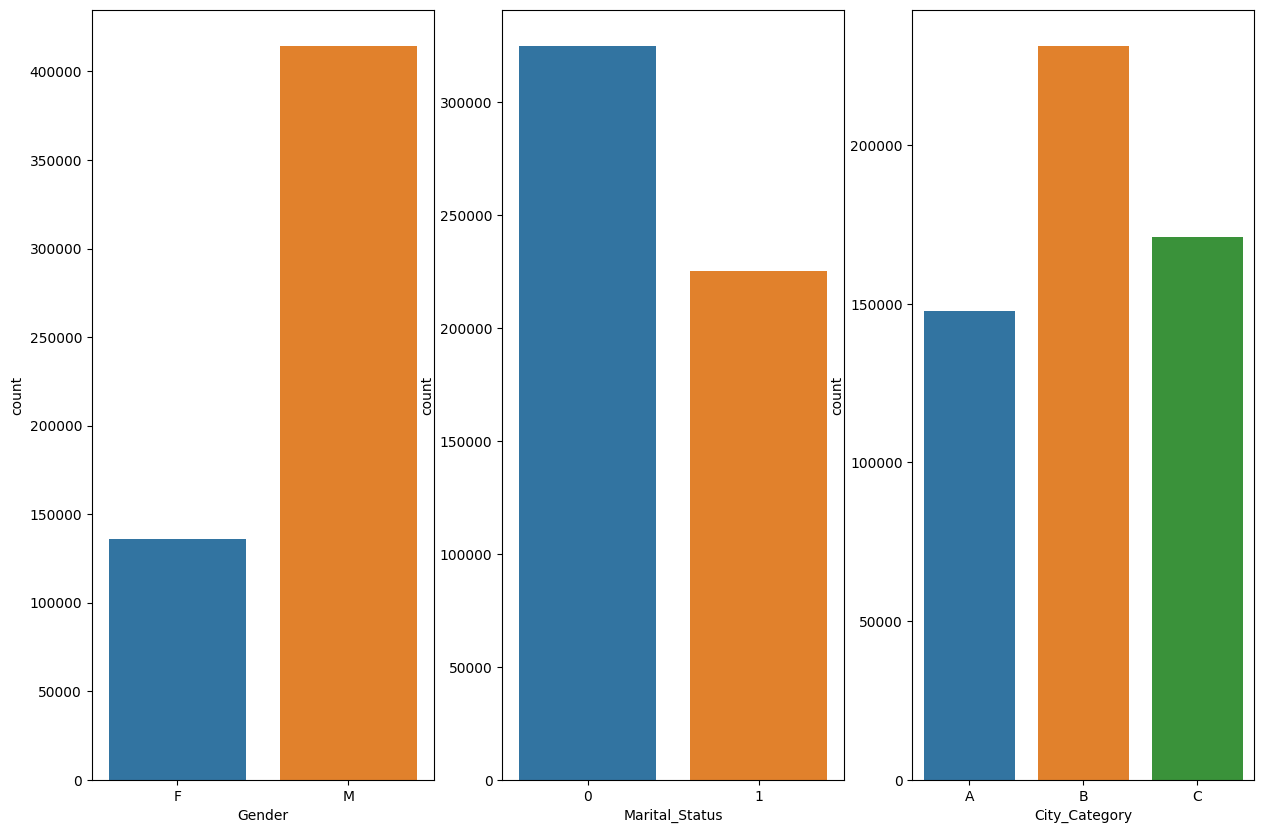

In [ ]:
fig,axis = plt.subplots(1,3, figsize=(15,10))
sns.countplot(data=df,x='Gender', ax=axis[0])
sns.countplot(data=df,x='Marital_Status', ax=axis[1])
sns.countplot(data=df,x='City_Category', ax=axis[2])
plt.show()

([<matplotlib.patches.Wedge at 0x7fad6f7dbaf0>,
 [Text(-0.785367774085001, 0.7701931312526561, 'M'),
  Text(0.7853677019743126, -0.7701932047840901, 'F')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.3%'),
  Text(0.42838238289507957, -0.42010538442768547, '24.7%')])

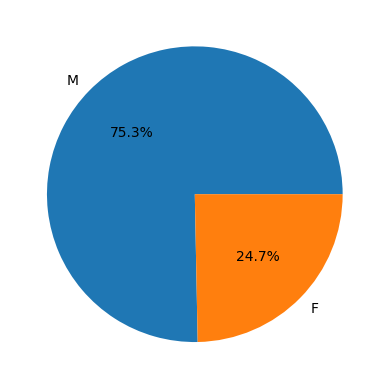

In [ ]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct = '%.1f%%')

([<matplotlib.patches.Wedge at 0x7fad6f632800>,
 [Text(-0.3080415398264776, 1.0559878833307383, '0'),
  Text(0.30804144095775543, -1.055987912171664, '1')],
 [Text(-0.16802265808716957, 0.5759933909076753, '59.0%'),
  Text(0.16802260415877565, -0.5759934066390894, '41.0%')])

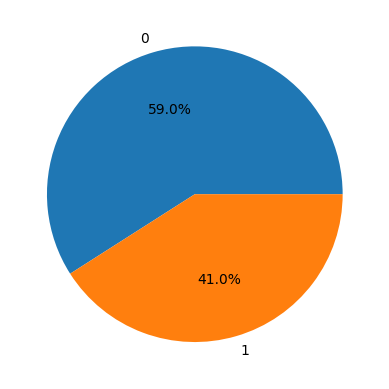

In [ ]:
plt.pie(df['Marital_Status'].value_counts().values,labels=df['Marital_Status'].value_counts().index,autopct = '%.1f%%')

([<matplotlib.patches.Wedge at 0x7fad6f69d330>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42.0%'),
  Text(-0.5331294664510843, -0.27526890852688435, '31.1%'),
  Text(0.3988350646218405, -0.4482528206582668, '26.9%')])

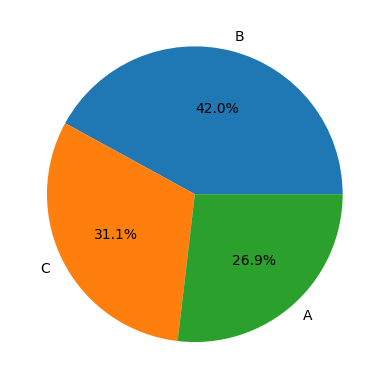

In [ ]:
plt.pie(df['City_Category'].value_counts().values,labels=df['City_Category'].value_counts().index,autopct = '%.1f%%')

In [ ]:
# observation:
# 1) Gender : This Data indicate that male purchase percentage is more as
# compare to female
# 2) Maritial Status: This Data indicate that unmarried people has more purchase
# percentage as compare to married people
# 3) City Cateogory: This Data indicates that city B has more transactions
# as compare to A and B

[Text(0, 0, '26-35'),
 Text(1, 0, '36-45'),
 Text(2, 0, '18-25'),
 Text(3, 0, '46-50'),
 Text(4, 0, '51-55'),
 Text(5, 0, '55+'),
 Text(6, 0, '0-17')]

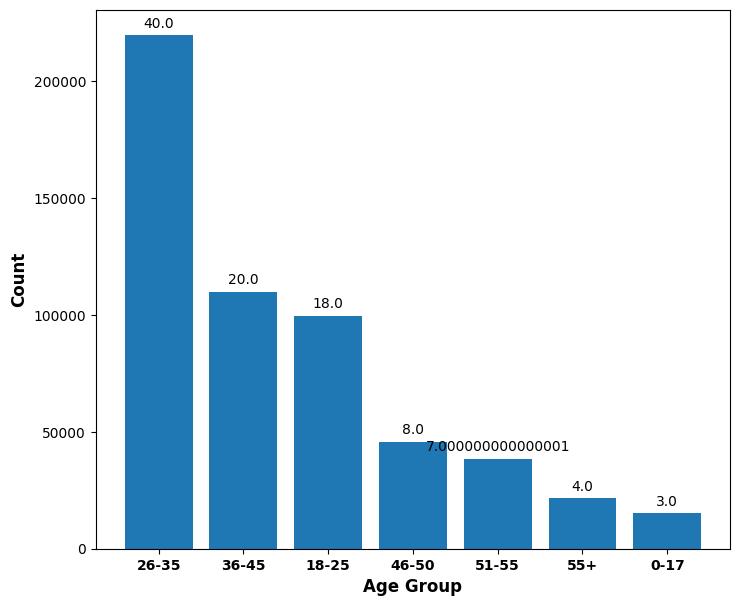

In [ ]:
# Customer Age Distribution
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(1,2,width_ratios=[0.6,0.4])
ax = fig.add_subplot(gs[0,0])
temp = df['Age'].value_counts()
for i in temp.index:
  ax.text(i,temp[i]+5000,round(temp[i]/len(df),2)*100,ha='center',va='center')

ax.bar(x=temp.index,height=temp.values)
ax.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax.set_xlabel('Age Group',fontweight = 'bold',fontsize = 12)
ax.set_xticklabels(temp.index,fontweight = 'bold')

In [ ]:
# observation:
# 1) The age group of 26-35 are having highest frequency in
# shopping as compare to other age group and they are most
# active and interested people.
# 2) The age group 2 and 3 are the also the group which are intrested
# active for sales.
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4+'),
 Text(4, 0, '0')]

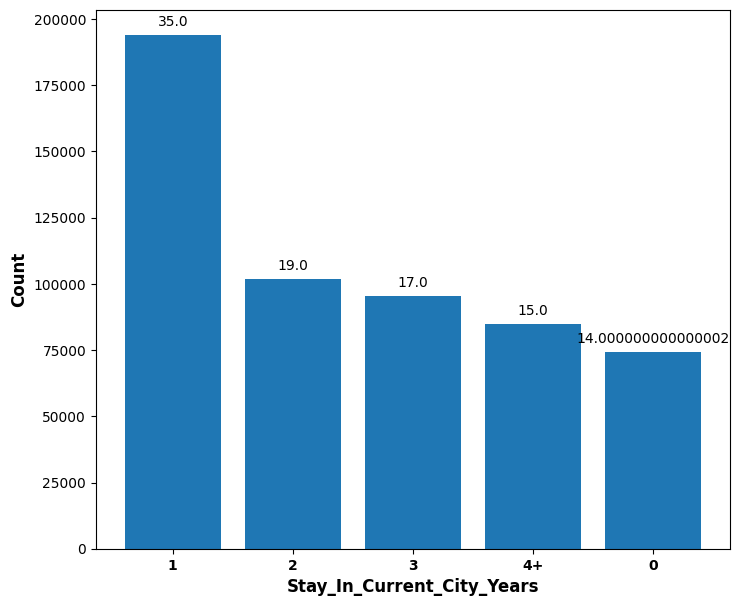

In [ ]:
# Customer stay in current city Distribution
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(1,2,width_ratios=[0.6,0.4])
ax = fig.add_subplot(gs[0,0])
temp = df['Stay_In_Current_City_Years'].value_counts()
for i in temp.index:
  ax.text(i,temp[i]+5000,round(temp[i]/len(df),2)*100,ha='center',va='center')

ax.bar(x=temp.index,height=temp.values)
ax.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax.set_xlabel('Stay_In_Current_City_Years',fontweight = 'bold',fontsize = 12)
ax.set_xticklabels(temp.index,fontweight = 'bold')

In [ ]:
# observation:
# 1) The data suggest that the 35% people who stay in the city less
# than year or to 1 year are more likely to visit to walmart.

Text(0, 0.5, 'Product ID')

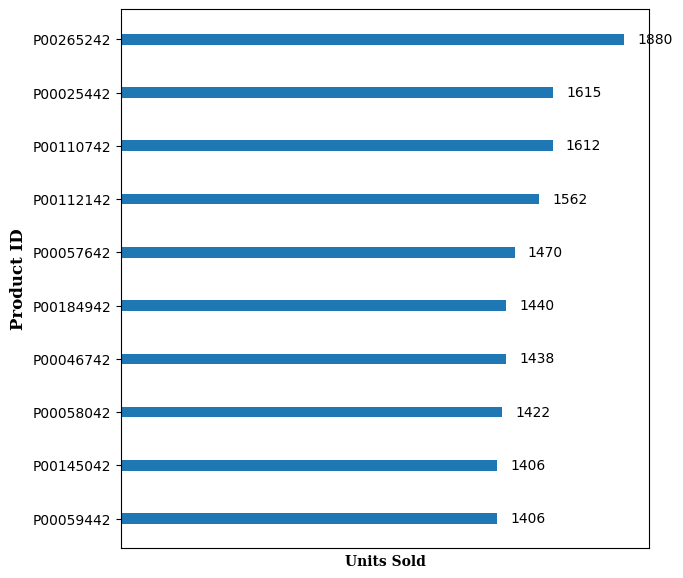

In [ ]:
# Top 10 Products
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(1,2)

ax = fig.add_subplot(gs[0,0])
temp = df['Product_ID'].value_counts()[0:10]
temp = temp.iloc[-1:-11:-1]
ax.barh(y=temp.index,width=temp.values,height=0.2)
for y,x in zip(temp.index,temp.values):
  ax.text(x+50,y,x,va='center')
ax.set_xticks([])
ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})

#Top 10 Product Category Sales

# ax = fig.add_subplot(gs[0,1])
# temp1 = df['Product_Category'].value_counts()[0:10]
# ax.barh(y=temp1.index,width=temp1.values,height=0.2)
# # ax.set_xticks([])
# # for y1,x1 in zip(temp1.index,temp1.values):
# #   ax.text(x1+5000,y1,x1,va='center')
# # ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
# # ax.set_ylabel('Product Category',{'font':'serif', 'size':12,'weight':'bold'})
# plt.show()

In [ ]:
# observation:
# 1) top 10 Products sold - The top selling products during walmart
# nlack friday sales are characterized by a relatively small variation in
# sales numbers


In [ ]:
# Bivariate analysis
# Gender VS Purchase Amount
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum']/10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])


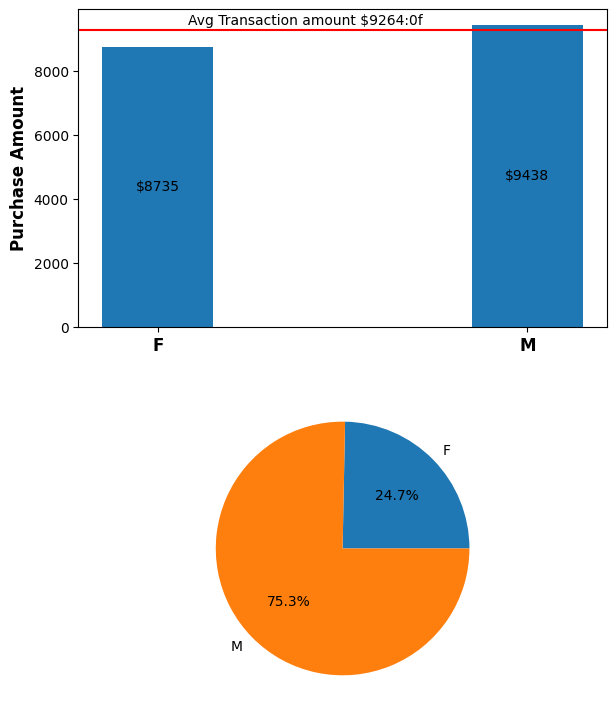

In [ ]:
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.bar(temp['Gender'],temp['per_purchase'],width=0.3)
avg = round(df['Purchase'].mean())
ax.axhline(y=avg,color='red')
ax.text(0.4,avg+300,f"Avg Transaction amount ${avg}:0f",ha='center',va='center')
for i in temp.index:
  ax.text(temp.loc[i,'Gender'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
          ha='center',va='center')

ax.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax.set_xticklabels(temp['Gender'],fontweight = 'bold',fontsize = 12)




# creating pie chart for gender disribution

ax1 = fig.add_subplot(gs[1,0])
ax1.pie(temp['count'],labels=temp['Gender'],autopct='%.1f%%')
plt.show()

In [ ]:
# observation
# 1) total Sales and transaction Comparison
# - the Total purchase amount and number of transactions by male customers was more than
# female customers.
# 2) Average transaction value
# - the avg transaction value is high for male as compare to female
# ($9438 vs $8735)

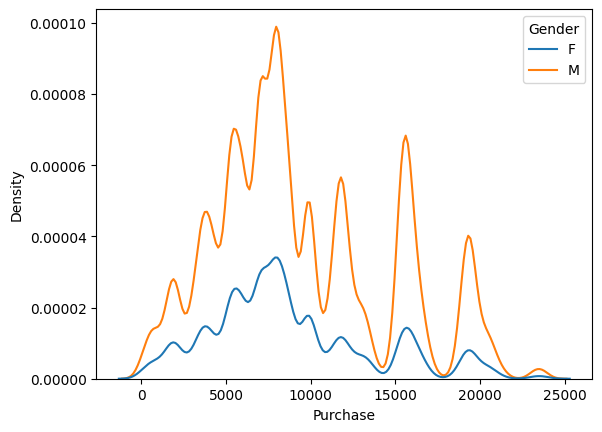

In [ ]:
 # creating kdeplot for purchase amount distribution
 import seaborn as sns
 sns.kdeplot(data=df,x='Purchase',hue='Gender')
 plt.show()

In [ ]:
# Confidence interval Construction :
# Estimating average Purchase Amount Per Transaction
# 1) step 1 - Building CLT Curve
# - As seen above the purchase amount is not normal.
# so we need to use Central Limit Theorem.
# It states th distribution of sample means will approximate a
# normal distribution.
# 2) building Confidence interval
# - After building CLT curve, we will create a confidece interval predicting
# polulation mean at 99%,95%,90% Confidece level
# using sample sizes like : [100,1000,5000,50000]

In [ ]:
#  creating a function to calculate confidence interval
def confidence_interval(data,ci):
  l_ci = (100-ci)/2 #-- > lower limit
  u_ci = (100+ci)/2 # -- > upper limit
  # calculating lower and upper range
  interval = np.percentile(data,[l_ci,u_ci]).round(0)
  return interval

In [ ]:

# ploting the confidence interval
def plot(ci):
  fig = plt.figure(figsize=(15,8))
  gs = fig.add_gridspec(2,2)

  #creating separate data frames for each gender
  df_male = df.loc[df['Gender'] == 'M','Purchase']
  df_female = df.loc[df['Gender'] == 'F','Purchase']

  #sample sizes and corresponding plot positions
  sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0)]


  #number of samples to be taken from purchase amount
  bootstrap_sample = 20000
  male_sample = {}
  female_sample = {}
  for i,x,y in sample_sizes:
    male_means = []
    female_means = []

    for j in range(bootstrap_sample):

      #creating random 5000 samples of i sample size
      male_bootstrapped_samples = np.random.choice(df_male,size=i)
      female_bootstrapped_sample = np.random.choice(df_female,size=i)
      # print(len(male_bootstrapped_samples))

      # calculating mean of those samples
      male_sample_mean = np.mean(male_bootstrapped_samples)
      female_sample_mean = np.mean(female_bootstrapped_sample)

      # appending the mean to list
      male_means.append(male_sample_mean)
      female_means.append(female_sample_mean)

    # print(len(male_means))
    # print(len(female_means))
    male_sample[f'{ci}%_{i}'] = male_means
    female_sample[f'{ci}%{i}'] = female_means

    temp_df = pd.DataFrame(data={'male_means':male_means,'female_means':female_means})
    ax = fig.add_subplot(gs[x,y])
    sns.kdeplot(data=temp_df,x='male_means',ax=ax,label='Male')
    sns.kdeplot(data=temp_df,x='female_means',ax=ax,label='Female')

      # calculating confidence intervals for given confidence level
    m_range = confidence_interval(male_means,ci)
    f_range = confidence_interval(female_means,ci)

    for k in m_range:
      ax.axvline(x=k,ymax=0.9,linestyle='--')

    for k in f_range:
      ax.axvline(x=k,ymax=0.9,linestyle='--')

    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})
    plt.legend()

  # print(len(male_sample))
  # print(len(female_sample))

  fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

  plt.show()
  return male_sample,female_sample


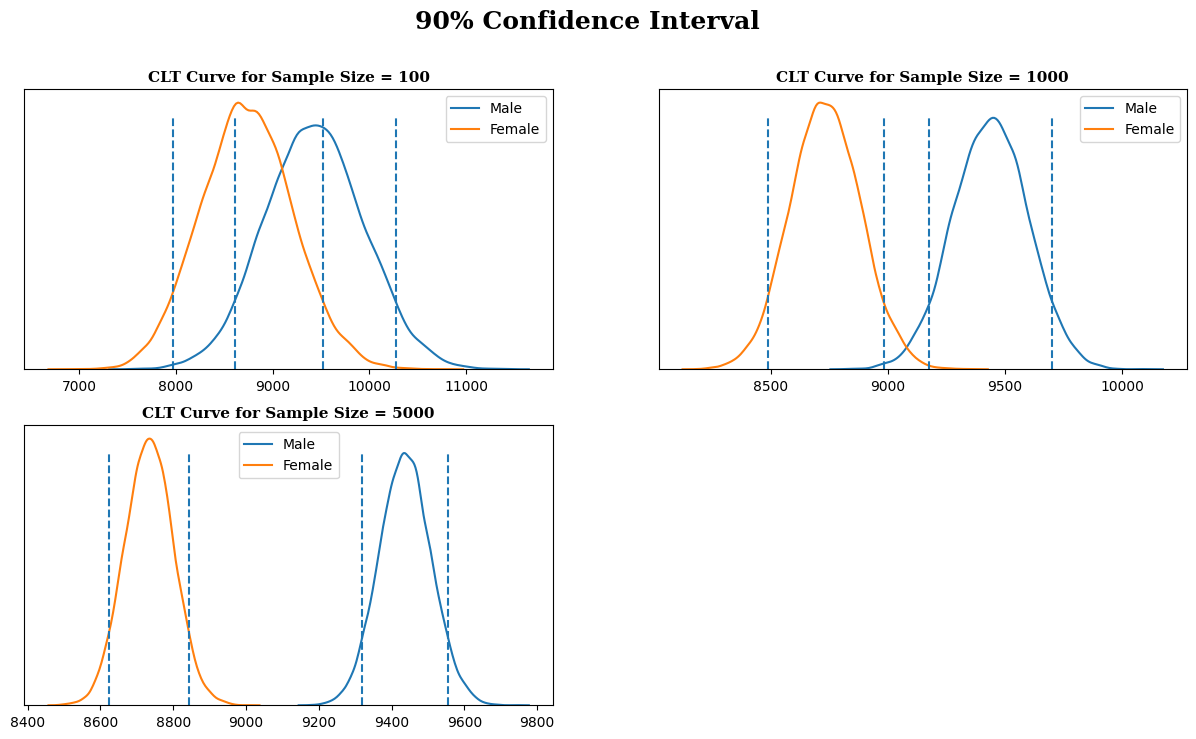

In [ ]:
m_samp_90,f_samp_90 = plot(90)

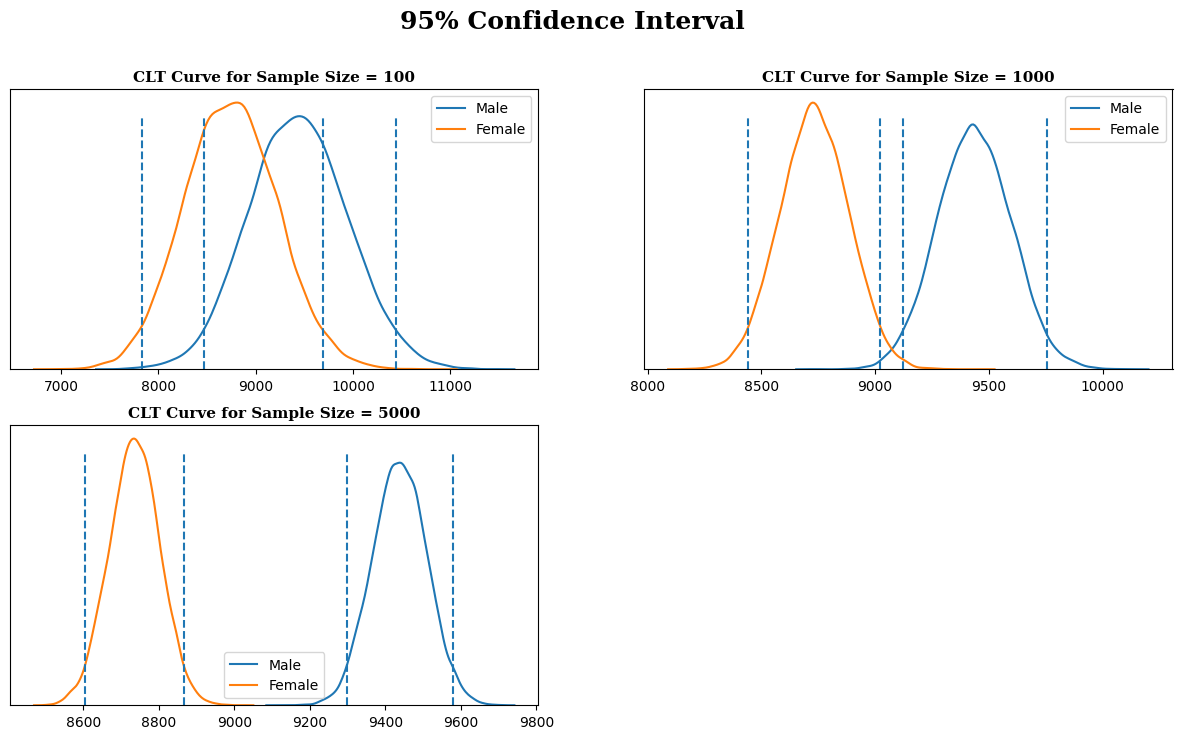

In [ ]:
m_samp_95,f_samp_95 = plot(95)

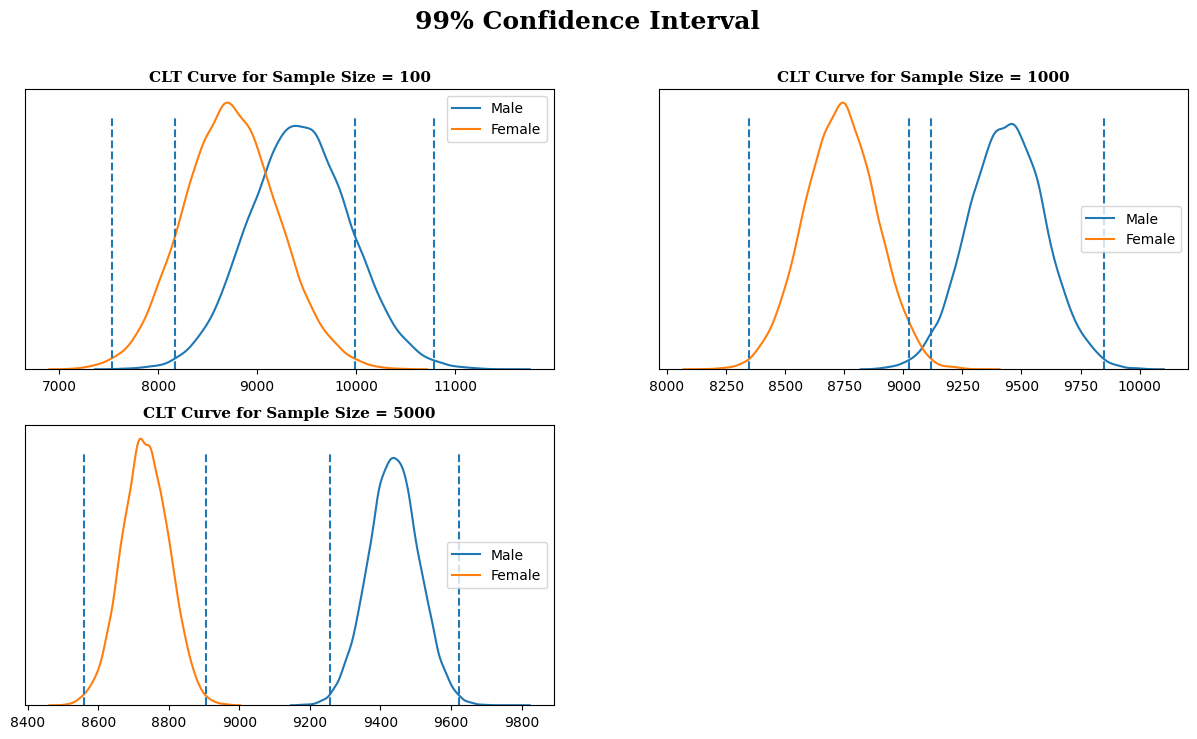

In [ ]:
m_samp_99,f_samp_99 = plot(99)

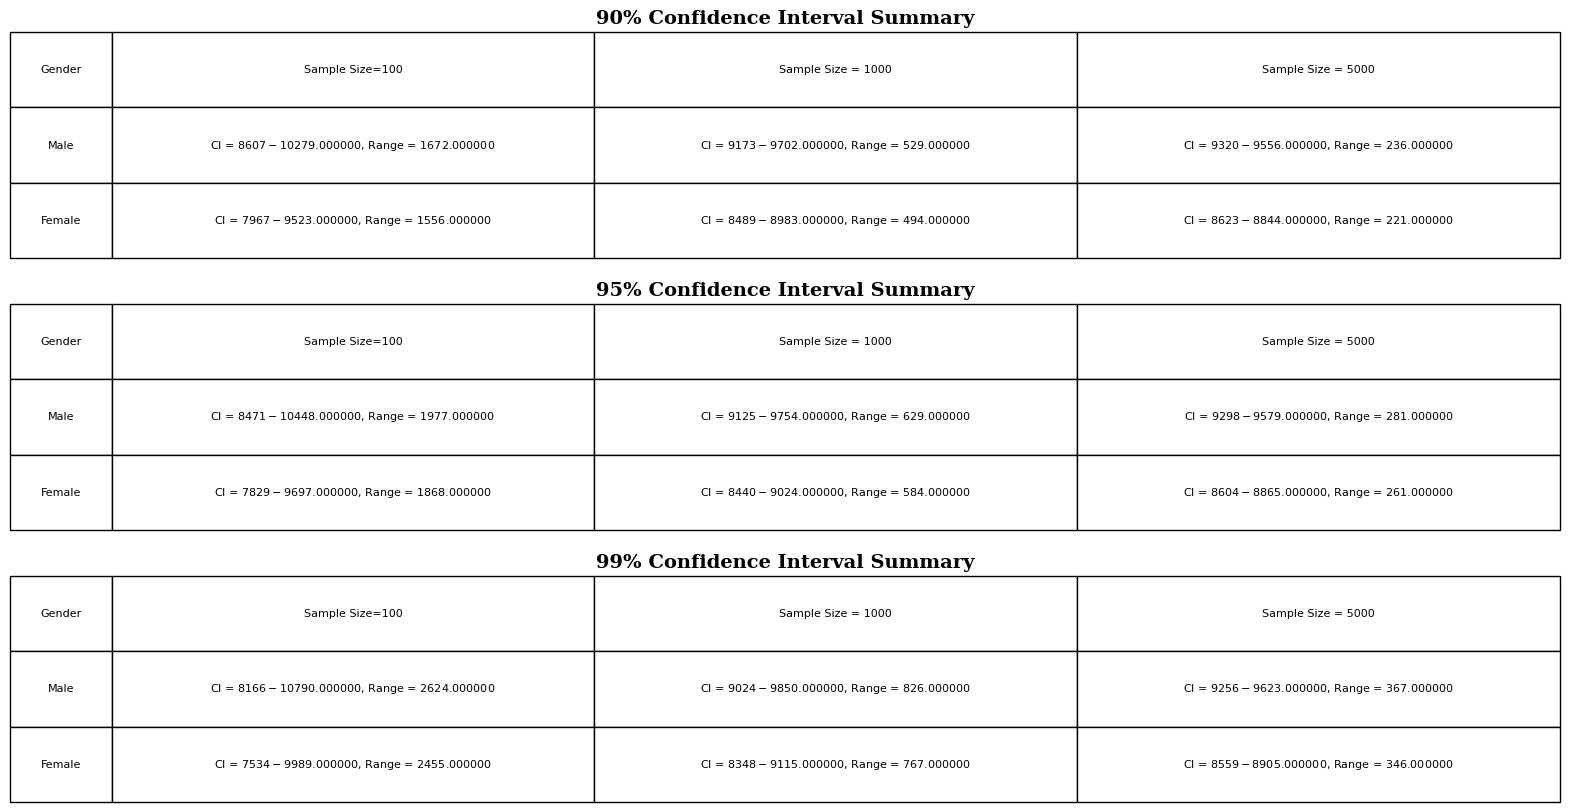

In [ ]:
# Are confidence intervals of average male and female spending overlapping
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
  m_ci = ["Male"]
  f_ci = ['Female']

# finding CI for each sample size [Male]
  for m in i:
    m_range = confidence_interval(i[m],k)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:0f}, Range = {(m_range[1] - m_range[0]):0f}")


# finding CI for each sample size [Male]
  for f in j:
    f_range = confidence_interval(j[f],k)
    f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:0f}, Range = {(f_range[1] - f_range[0]):0f}")


  ax = fig.add_subplot(gs[l])

  ci_info = [m_ci,f_ci]

# ci_info
  table = ax.table(cellText = ci_info,cellLoc='center',
                 colLabels=['Gender','Sample Size=100','Sample Size = 1000','Sample Size = 5000'],
                 colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375],bbox=[0,0,1,1])

  table.set_fontsize(13)

  ax.axis('off')
  ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

In [ ]:
# observation:
# 1) Sample Size:
# It suggests that as the sample size increase ,the confidence intervals become narrower and more precise.
# This implies that in business larger sample size can provide more reliable insights and estimate.

# 2) Confidence Interval:
# From the above analysis we can see that except for Sample 100 .
# The confidence intervals do not overlap as the sample size increase.
# This means that there is a statistically significant difference
#  between the avg spending per transaction for men and women

In [ ]:
# MaritialStatus VS Purchase Amount
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum']/10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,0,3008927447,324731,3.01,0.59,9266.0
1,1,2086885295,225337,2.09,0.41,9261.0


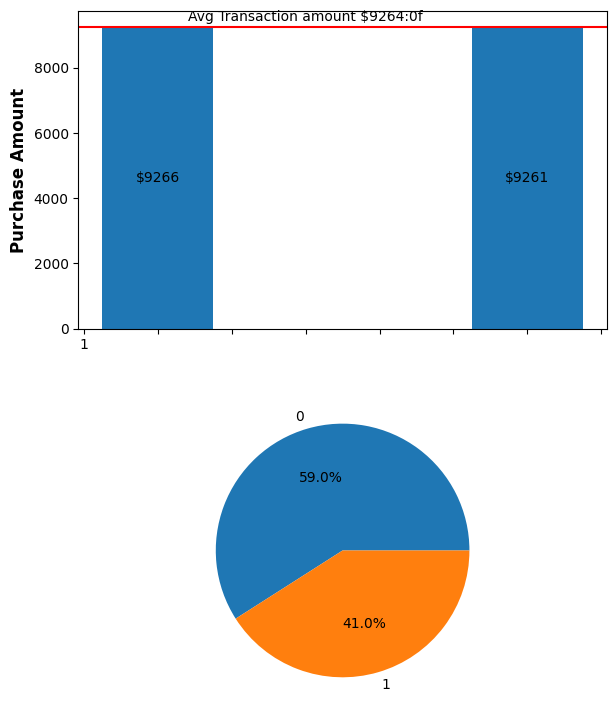

In [ ]:
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.bar(temp['Marital_Status'],temp['per_purchase'],width=0.3)
avg = round(df['Purchase'].mean())
ax.axhline(y=avg,color='red')
ax.text(0.4,avg+300,f"Avg Transaction amount ${avg}:0f",ha='center',va='center')
for i in temp.index:
  ax.text(temp.loc[i,'Marital_Status'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
          ha='center',va='center')

ax.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax.set_xticklabels(temp['Marital_Status'])




# creating pie chart for gender disribution

ax1 = fig.add_subplot(gs[1,0])
ax1.pie(temp['count'],labels=temp['Marital_Status'],autopct='%.1f%%')
plt.show()

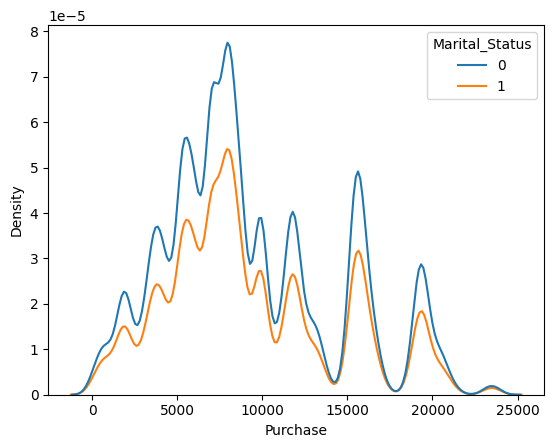

In [ ]:
 # creating kdeplot for purchase amount distribution
 import seaborn as sns
 sns.kdeplot(data=df,x='Purchase',hue='Marital_Status')
 plt.show()

In [ ]:
# observation
# Total Sales and Transaction
# - The analysis tells that more number of transactions are done by
# unmarried customers as compare to married
# Average purchase amount per transaction was almost similer
# for married and unmarried customers ($9261 vs $92266)

In [ ]:
# Confidence interval Construction :
# Estimating average Purchase Amount Per Transaction
# 1) step 1 - Building CLT Curve
# - As seen above the purchase amount is not normal.
# so we need to use Central Limit Theorem.
# It states th distribution of sample means will approximate a
# normal distribution.
# 2) building Confidence interval
# - After building CLT curve, we will create a confidece interval predicting
# polulation mean at 99%,95%,90% Confidece level
# using sample sizes like : [100,1000,5000,50000]

In [ ]:

# ploting the confidence interval
def plot(ci):
  fig = plt.figure(figsize=(15,8))
  gs = fig.add_gridspec(2,2)

  #creating separate data frames for each gender
  df_unmarried = df.loc[df['Marital_Status'] == 0,'Purchase']
  df_married = df.loc[df['Marital_Status'] == 1,'Purchase']
  print("--------------------------")
  print(df_married)
  print(df_unmarried)
  #sample sizes and corresponding plot positions
  sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0)]


  #number of samples to be taken from purchase amount
  bootstrap_sample = 20000

  married_sample = {}
  unmarried_sample = {}

  for i,x,y in sample_sizes:
    married_means = []
    unmarried_means = []

    for j in range(bootstrap_sample):

      #creating random 5000 samples of i sample size
      married_bootstrapped_samples = np.random.choice(df_married,size=i)
      unmarried_bootstrapped_sample = np.random.choice(df_unmarried,size=i)
      # print(len(male_bootstrapped_samples))

      # calculating mean of those samples
      married_sample_mean = np.mean(married_bootstrapped_samples)
      unmarried_sample_mean = np.mean(unmarried_bootstrapped_sample)

      # appending the mean to list
      married_means.append(married_sample_mean)
      unmarried_means.append(unmarried_sample_mean)

    # print(len(male_means))
    # print(len(female_means))
    married_sample[f'{ci}%_{i}'] = married_means
    unmarried_sample[f'{ci}%{i}'] = unmarried_means

    temp_df = pd.DataFrame(data={'married_means':married_means,'unmarried_means':unmarried_means})
    ax = fig.add_subplot(gs[x,y])
    sns.kdeplot(data=temp_df,x='married_means',ax=ax,label='Married')
    sns.kdeplot(data=temp_df,x='unmarried_means',ax=ax,label='Unmarried')

      # calculating confidence intervals for given confidence level
    m_range = confidence_interval(married_means,ci)
    u_range = confidence_interval(unmarried_means,ci)

    for k in m_range:
      ax.axvline(x=k,ymax=0.9,linestyle='--')

    for k in u_range:
      ax.axvline(x=k,ymax=0.9,linestyle='--')

    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})
    plt.legend()

  # print(len(male_sample))
  # print(len(female_sample))

  fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

  plt.show()
  return married_sample,unmarried_sample


--------------------------
6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64
0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64


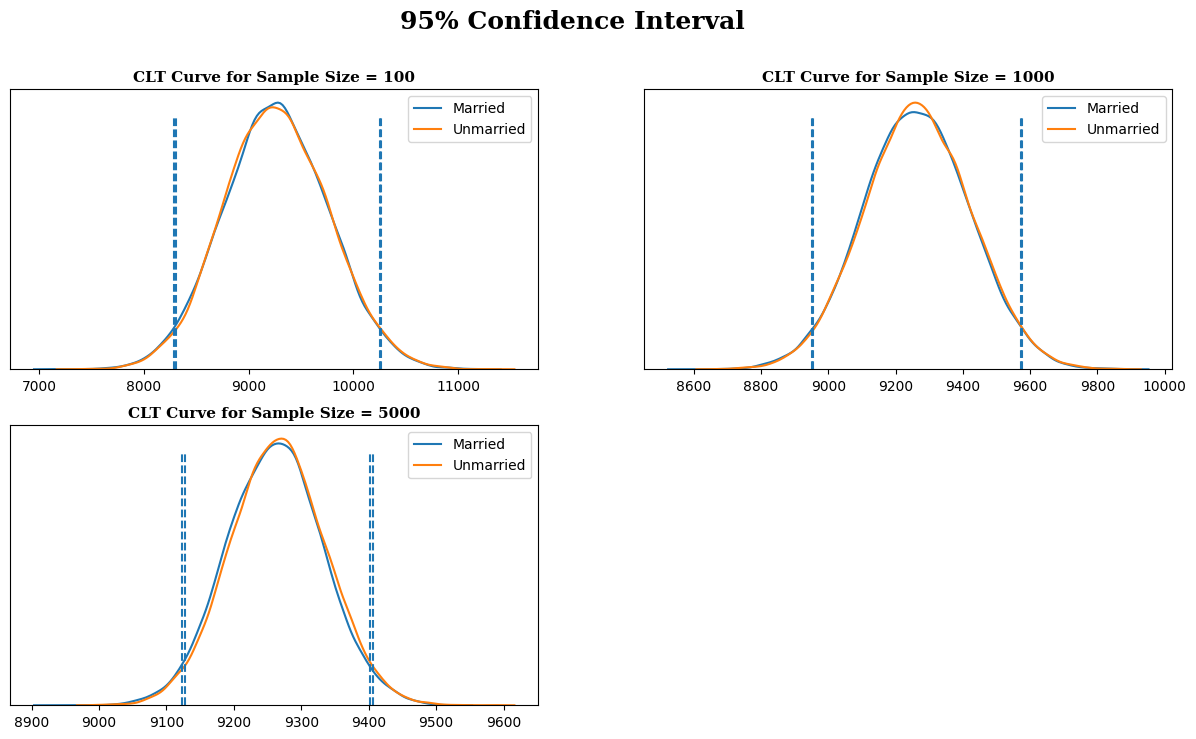

In [ ]:
m_samp_95,u_samp_95 = plot(95)

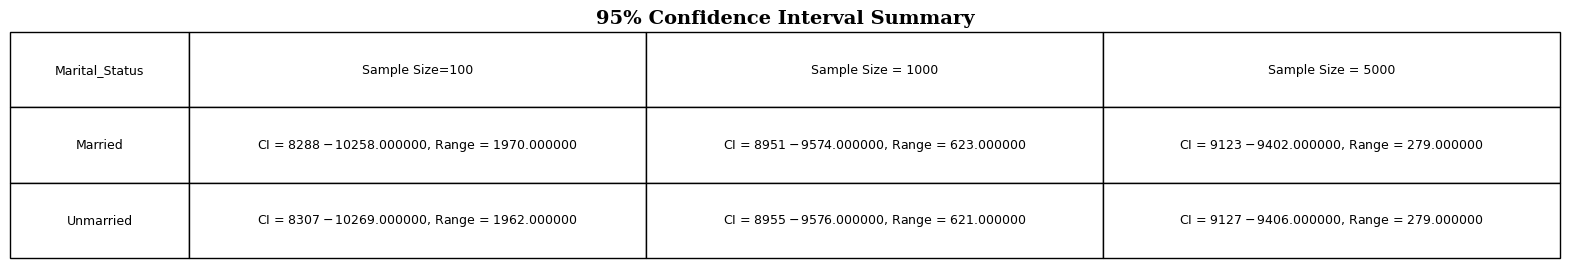

In [ ]:
# Are confidence intervals of average male and female spending overlapping
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
  m_ci = ["Married"]
  u_ci = ['Unmarried']

# finding CI for each sample size [Male]
  for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:0f}, Range = {(m_range[1] - m_range[0]):0f}")


# finding CI for each sample size [Male]
  for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:0f}, Range = {(u_range[1] - u_range[0]):0f}")


  ax = fig.add_subplot(gs[l])

  ci_info = [m_ci,u_ci]

# ci_info
  table = ax.table(cellText = ci_info,cellLoc='center',
                 colLabels=['Marital_Status','Sample Size=100','Sample Size = 1000','Sample Size = 5000'],
                 colLoc = 'center',colWidths = [0.1,0.255,0.255,0.255,0.255],bbox=[0,0,1,1])

  table.set_fontsize(13)

  ax.axis('off')
  ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})
  plt.show()

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
# Observation:
# Sample Size :
# As the Anlaysis implies that as the sample size increase the confidence interval become narrower and
# more precise
# Confidence interval
# From the Above Anlysis we can see that confidence interval overlap for all samples sizes.
# this means that there is no significant difference between avg spending
# per transaction for married and unmarried customers


In [ ]:
# Customer Age vs Purchase
# MaritialStatus VS Purchase Amount
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum']/10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


[Text(0, 0, '0-17'),
 Text(1, 0, '18-25'),
 Text(2, 0, '26-35'),
 Text(3, 0, '36-45'),
 Text(4, 0, '46-50'),
 Text(5, 0, '51-55'),
 Text(6, 0, '55+')]

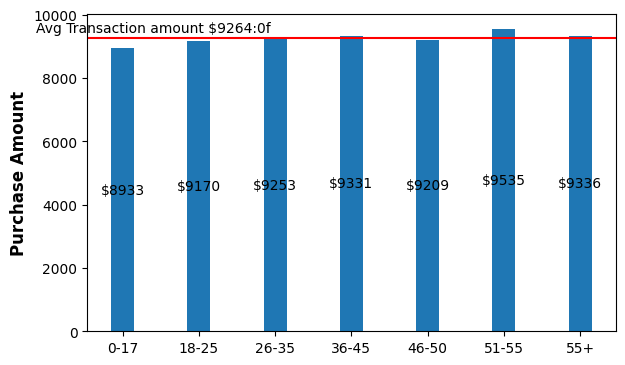

In [ ]:
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2)

ax = fig.add_subplot(gs[0,0])
ax.bar(temp['Age'],temp['per_purchase'],width=0.3)
avg = round(df['Purchase'].mean())
ax.axhline(y=avg,color='red')
ax.text(0.4,avg+300,f"Avg Transaction amount ${avg}:0f",ha='center',va='center')
for i in temp.index:
  ax.text(temp.loc[i,'Age'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
          ha='center',va='center')

ax.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax.set_xticklabels(temp['Age'])


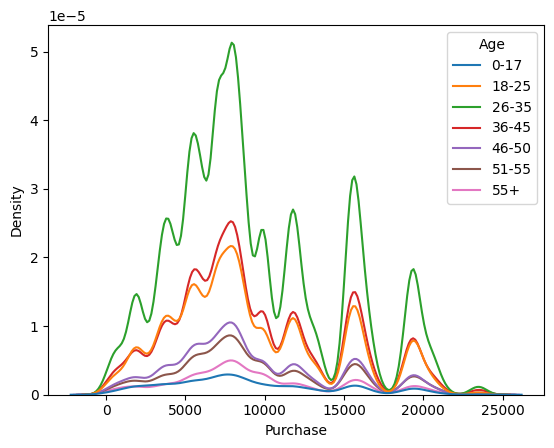

In [ ]:
 # creating kdeplot for purchase amount distribution
 import seaborn as sns
 sns.kdeplot(data=df,x='Purchase',hue='Age')
 plt.show()

In [ ]:
# observation:
# Age group between 26-45 accounts to almost 60% of the total sales suggesting that walmart black friday sales
# among these age group
# Distribution of purchase Amount is not distributed as seen above


Confidence Interval: Estimating Average Purchase Amount Per Transaction

In [ ]:
# Confidence interval Construction :
# Estimating average Purchase Amount Per Transaction
# 1) step 1 - Building CLT Curve
# - As seen above the purchase amount is not normal.
# so we need to use Central Limit Theorem.
# It states th distribution of sample means will approximate a
# normal distribution.
# 2) building Confidence interval
# - After building CLT curve, we will create a confidece interval predicting
# polulation mean at 99%,95%,90% Confidece level
# using sample sizes like : [100,1000,5000,50000]

In [ ]:

# ploting the confidence interval
def plot(ci):
  fig = plt.figure(figsize=(15,15))
  gs = fig.add_gridspec(4,1)

  #creating separate data frames for each gender

  df_1 = df.loc[df['Age'] == '0-17','Purchase']
  df_2 = df.loc[df['Age'] == '18-25','Purchase']
  df_3 = df.loc[df['Age'] == '26-35','Purchase']
  df_4 = df.loc[df['Age'] == '36-45','Purchase']
  df_5 = df.loc[df['Age'] == '46-50','Purchase']
  df_6 = df.loc[df['Age'] == '51-55','Purchase']
  df_7 = df.loc[df['Age'] == '55+','Purchase']

  #sample sizes and corresponding plot positions
  sample_sizes = [(100,0),(1000,1),(5000,2)]


  #number of samples to be taken from purchase amount
  bootstrap_sample = 20000

  samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

  for i,x in sample_sizes:
    l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

    for j in range(bootstrap_sample):

      #creating random 5000 samples of i sample size
      bootstrapped_samples_1 = np.random.choice(df_1,size = i)
      bootstrapped_samples_2 = np.random.choice(df_2,size = i)
      bootstrapped_samples_3 = np.random.choice(df_3,size = i)
      bootstrapped_samples_4 = np.random.choice(df_4,size = i)
      bootstrapped_samples_5 = np.random.choice(df_5,size = i)
      bootstrapped_samples_6 = np.random.choice(df_6,size = i)
      bootstrapped_samples_7 = np.random.choice(df_7,size = i)


      # calculating mean of those samples
      sample_mean_1 = np.mean(bootstrapped_samples_1)
      sample_mean_2 = np.mean(bootstrapped_samples_2)
      sample_mean_3 = np.mean(bootstrapped_samples_3)
      sample_mean_4 = np.mean(bootstrapped_samples_4)
      sample_mean_5 = np.mean(bootstrapped_samples_5)
      sample_mean_6 = np.mean(bootstrapped_samples_6)
      sample_mean_7 = np.mean(bootstrapped_samples_7)

      # appending the mean to list
      l1.append(sample_mean_1)
      l2.append(sample_mean_2)
      l3.append(sample_mean_3)
      l4.append(sample_mean_4)
      l5.append(sample_mean_5)
      l6.append(sample_mean_6)
      l7.append(sample_mean_7)


    samples1[f'{ci}%_{i}'] = l1
    samples2[f'{ci}%_{i}'] = l2
    samples3[f'{ci}%_{i}'] = l3
    samples4[f'{ci}%_{i}'] = l4
    samples5[f'{ci}%_{i}'] = l5
    samples6[f'{ci}%_{i}'] = l6
    samples7[f'{ci}%_{i}'] = l7

    temp_df = pd.DataFrame(data={'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})
    ax = fig.add_subplot(gs[x])

    for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:

                 sns.kdeplot(data = temp_df,x = q,ax = ax,label = q)

      # calculating confidence intervals for given confidence level
    # m_range = confidence_interval(married_means,ci)
    # u_range = confidence_interval(unmarried_means,ci)

    # for k in m_range:
    #   ax.axvline(x=k,ymax=0.9,linestyle='--')

    # for k in u_range:
      # ax.axvline(x=k,ymax=0.9,linestyle='--')

    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})
    plt.legend()

  fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

  plt.show()
  return samples1,samples2,samples3,samples4,samples5,samples6,samples7


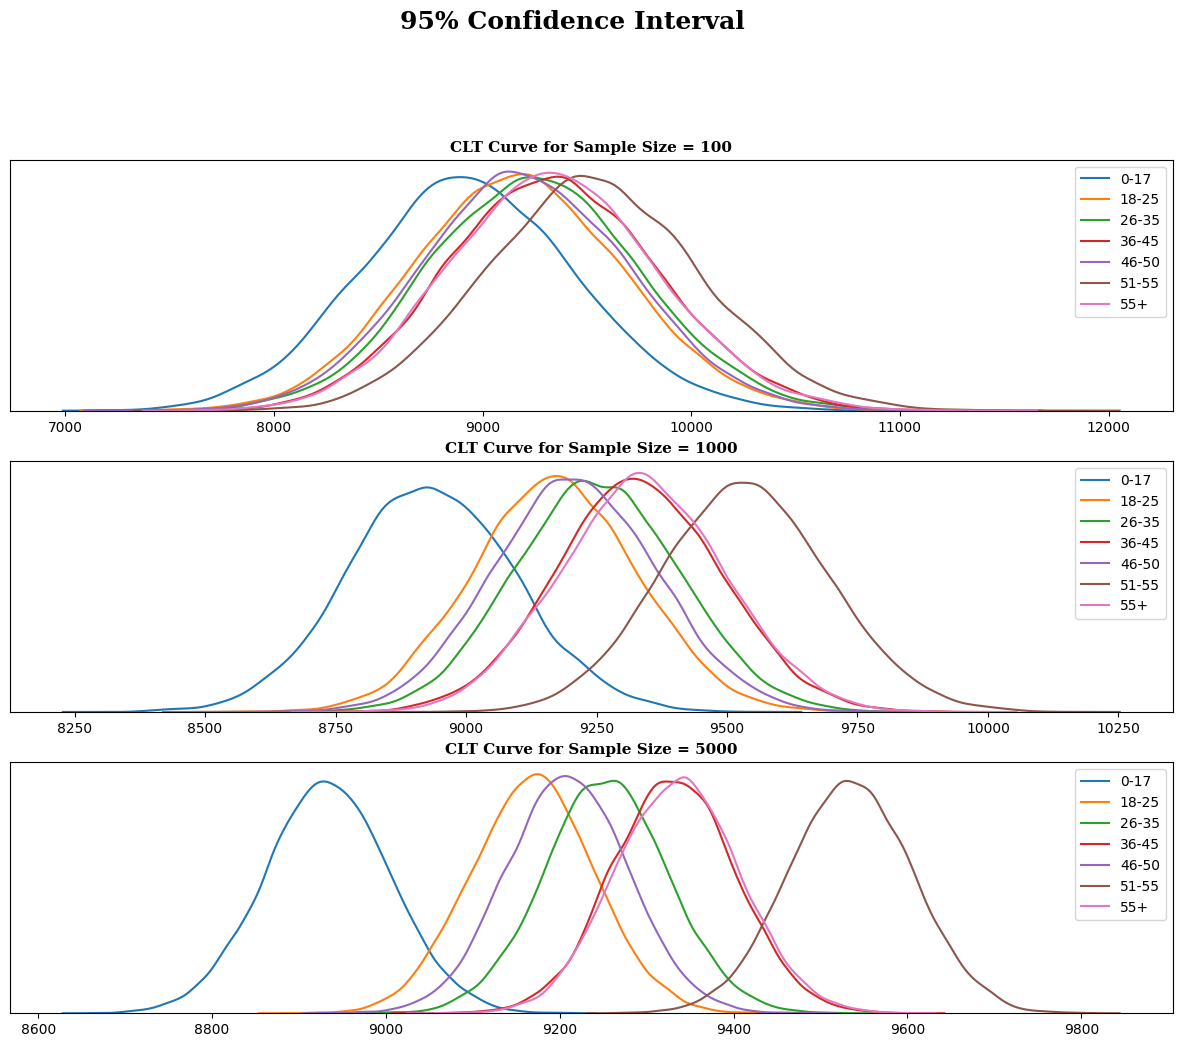

In [ ]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

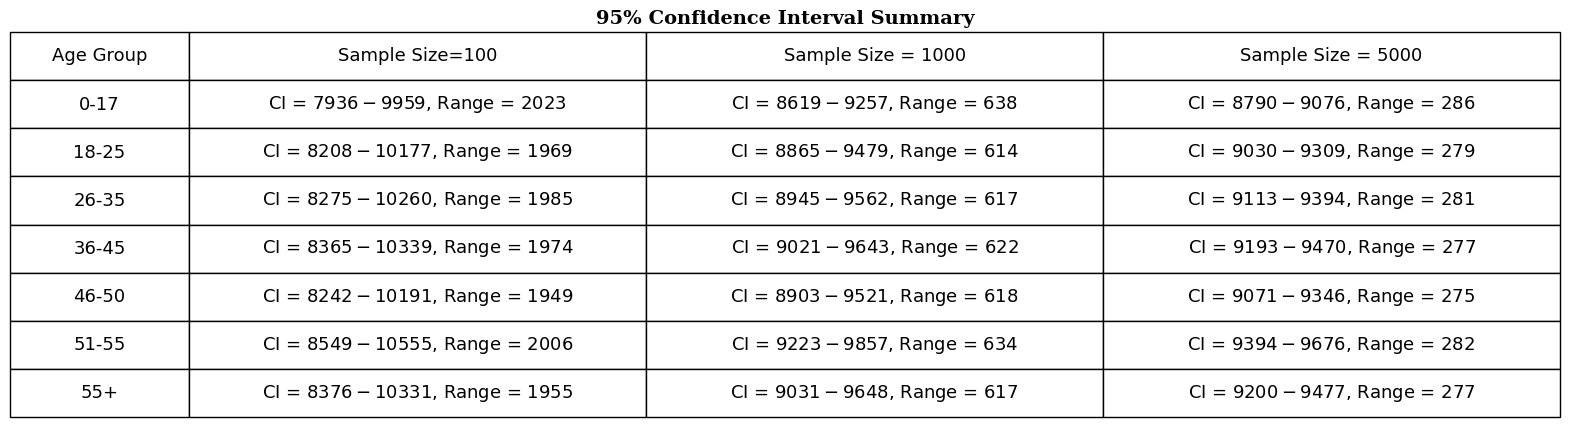

In [ ]:
# Are confidence intervals of average male and female spending overlapping
fig,ax = plt.subplots(figsize = (20,5))

ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]


for s,c in samples:
  for i in s:
    s_range = confidence_interval(s[i],95)
    c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")



  ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

# ci_info
table = ax.table(cellText = ci_info,cellLoc='center',
                 colLabels=['Age Group','Sample Size=100','Sample Size = 1000','Sample Size = 5000'],
                 colLoc = 'center',colWidths = [0.1,0.255,0.255,0.255,0.255],bbox=[0,0,1,1])

table.set_fontsize(13)

ax.axis('off')
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})
plt.show()

In [ ]:
# observation:
# Sample Size - The analysis highlight the importance of sample size in estimating population
# parameter and it suggest that as the sample size increases the confidence interval become narrower and more precise
# Confidence Interval and customer spending patterns:
#   from the above analysis we can see that the confidence interval overlap for same of the age groups.
# 0-17 customers age group have the lowest spending per transaction.
# 18-25,26-35,46-50 customers age group have similer buying patterns
# and also for 36-45,55+ are having similer buying patterns

In [ ]:
# Recommendations
# 1) Target Male Customers:
# As the Male customers are spending more money on black friday sales on an average.
# Walmart should provide the discount and offers for more sales and special coupens for them.
# they should also attract female customers as well buying giving discount for them
# 2) Focus on age group 25- 45 as this group thus majority sales.
# Walmart should specifically cater to the preferences and needs of the this demographics
# they can include the offer on products which are popular among this age group.
# 3) Engage younger Shoppers
# As they can provide the fun game event to attract the young
# customers. they can keep offers which can be beneficial for parent as well as child
# 4) Customer Segemtation:
# - As the customers with age group 18-25,26-35 and 46-50 have similer patterns for buying
# they can suggest the products related to products which they are buying
# so it can lead to increase in the sales.
# 5) Post-Black Friday Engagement
# - Walmart should post discount or event emal or message to customer
# they should provide the coupen pass who have spend more on balck friday sales
